In [ ]:
!pip install segmentation_models_pytorch
!pip install wandb

# Iniatial

In [2]:
!mkdir Dataset
!mkdir Dataset/IMD2020

!wget -P Dataset/IMD2020 https://staff.utia.cas.cz/novozada/db/IMD2020.zip

--2024-04-18 07:06:33--  https://staff.utia.cas.cz/novozada/db/IMD2020.zip
Resolving staff.utia.cas.cz (staff.utia.cas.cz)... 147.231.16.197
Connecting to staff.utia.cas.cz (staff.utia.cas.cz)|147.231.16.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 592836398 (565M) [application/zip]
Saving to: ‘Dataset/IMD2020/IMD2020.zip’

IMD2020.zip         100%[===================>] 565.37M  2.54MB/s    in 2m 46s  

2024-04-18 07:09:21 (3.40 MB/s) - ‘Dataset/IMD2020/IMD2020.zip’ saved [592836398/592836398]



In [ ]:
!unzip /content/Dataset/IMD2020/IMD2020.zip -d /content/Dataset/IMD2020

In [7]:
!rm -r /content/Dataset/IMD2020/IMD2020.zip

In [ ]:
# import shutil

# shutil.rmtree('/Project/Dataset', ignore_errors=True)

# Libraries

In [9]:
# For managing COCO dataset
# from pycocotools.coco import COCO

# For creating and managing folder/ files
import glob
import os
import shutil

# For managing images
from PIL import Image
import skimage.io as io

# Basic libraries
import numpy as np
import pandas as pd
import random
import cv2

# For plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import wandb

# For importing models and working with them
## Torch
import torch
import torch.utils.data # for Dataset
import torch.nn as nn
from torch.optim import Adam
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset
import segmentation_models_pytorch as smp

## Torchvision
import torchvision
from torchvision.transforms import transforms

# For creating train - test splits
from sklearn.model_selection import train_test_split

import pathlib
import pylab
import requests
from io import BytesIO
from pprint import pprint
from tqdm import tqdm
import time
from imutils import paths

# Performance Metrics
from sklearn.metrics import multilabel_confusion_matrix


# Functions - to have them separated in files
import CalcMetrics as cm
import BinaryMasks as bm
import TrainModel as train
import ValidateModel as val
import CreateDataset as crd
import DisplayMetrics as dm
import PlotResults as pr


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


# %matplotlib inline

cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda


# Data

## Data Preparation

In [11]:
# Example usage:
dataset_path = '/content/Dataset/IMD2020'
num_folders = 300  # Number of folders to read
original_images, altered_images, masks = crd.load_dataset(dataset_path, num_folders)


# You can apply any transformations needed before creating the dataset
transforms_train = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Define transformations for test (optional)
transforms_test = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Create the dataset
dataset = crd.SegmentationDataset(original_images, altered_images, masks, transforms = transforms_train)


Starting loading dataset


## Training

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Downloading: "https://github.com/qubvel/segmentation_models.pytorch/releases/download/v0.0.2/mit_b3.pth" to /root/.cache/torch/hub/checkpoints/mit_b3.pth
100%|██████████| 170M/170M [00:10<00:00, 17.5MB/s]
wandb: Currently logged in as: bianca-apostolescu (bianca-team). Use `wandb login --relogin` to force relogin


Dataset length: 300
[INFO] TEST_SPLIT = 0.2 ...
Splits, Datasets, and Dataloaders
[INFO] Total time taken to create the dataset and dataloader: 0.01s
[INFO] found 300 examples in the training set...
trainSteps = 24, testSteps = 7, valSteps = 6


[INFO] Training the network for 15 epochs...


  7%|▋         | 1/15 [00:17<03:58, 17.01s/it]

[INFO] EPOCH: 1/15
Train loss: 0.835382


 13%|█▎        | 2/15 [00:36<03:58, 18.37s/it]

[INFO] EPOCH: 2/15
Train loss: 0.617759


 20%|██        | 3/15 [00:53<03:35, 17.94s/it]

[INFO] EPOCH: 3/15
Train loss: 0.494339


 27%|██▋       | 4/15 [01:08<03:04, 16.74s/it]

[INFO] EPOCH: 4/15
Train loss: 0.457762


 33%|███▎      | 5/15 [01:23<02:38, 15.88s/it]

[INFO] EPOCH: 5/15
Train loss: 0.405669


 40%|████      | 6/15 [01:37<02:18, 15.39s/it]

[INFO] EPOCH: 6/15
Train loss: 0.368511


 47%|████▋     | 7/15 [01:52<02:01, 15.22s/it]

[INFO] EPOCH: 7/15
Train loss: 0.344045


 53%|█████▎    | 8/15 [02:08<01:47, 15.40s/it]

[INFO] EPOCH: 8/15
Train loss: 0.333874


 60%|██████    | 9/15 [02:23<01:31, 15.33s/it]

[INFO] EPOCH: 9/15
Train loss: 0.321286


 67%|██████▋   | 10/15 [02:40<01:18, 15.80s/it]

[INFO] EPOCH: 10/15
Train loss: 0.309674


 73%|███████▎  | 11/15 [02:55<01:02, 15.65s/it]

[INFO] EPOCH: 11/15
Train loss: 0.301895


 80%|████████  | 12/15 [03:10<00:46, 15.50s/it]

[INFO] EPOCH: 12/15
Train loss: 0.296160


 87%|████████▋ | 13/15 [03:26<00:31, 15.61s/it]

[INFO] EPOCH: 13/15
Train loss: 0.287263


 93%|█████████▎| 14/15 [03:41<00:15, 15.35s/it]

[INFO] EPOCH: 14/15
Train loss: 0.280182


100%|██████████| 15/15 [03:56<00:00, 15.75s/it]

[INFO] EPOCH: 15/15
Train loss: 0.276460
[INFO] Total time taken to train the model: 236.33s


Average accuracy = 56.99999999999999%
Average precision = 56.99999999999999%
Average recall = 56.99999999999999%
Average f1_score = 56.99999999999999%
Average DICE = -34.0%
Average IOU = 10.0%




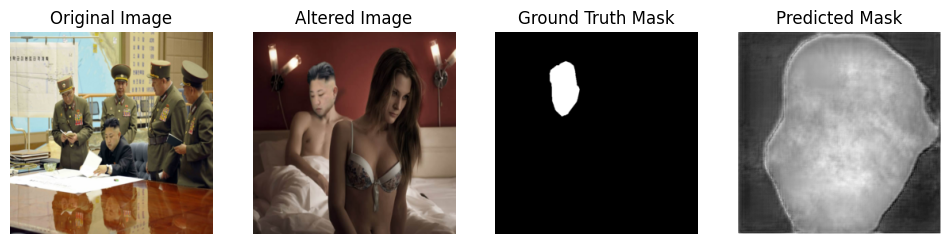

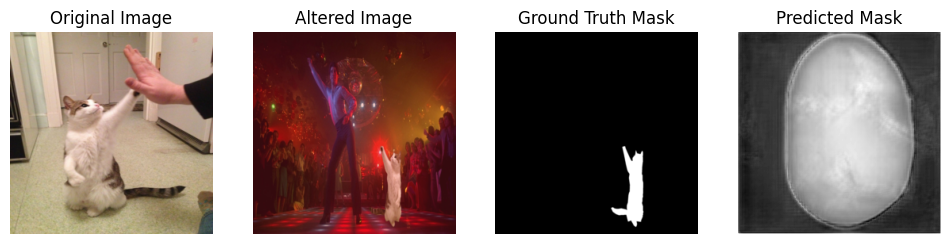

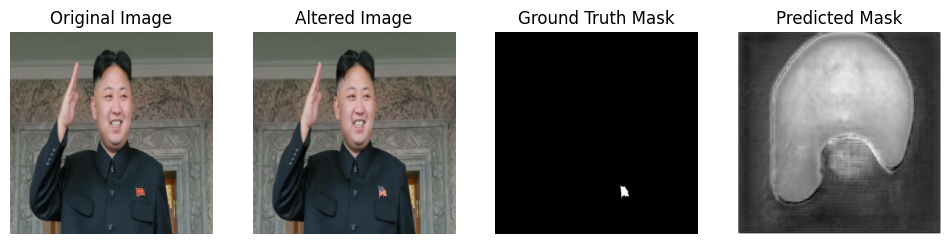

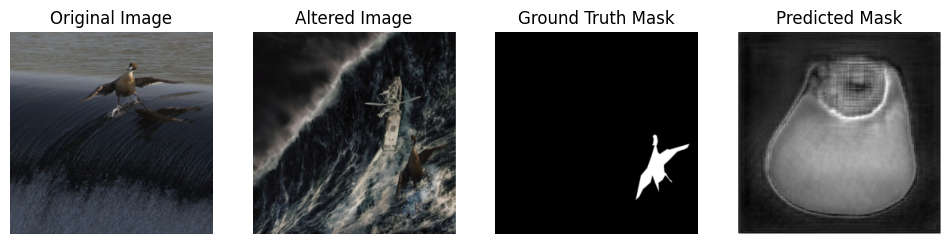

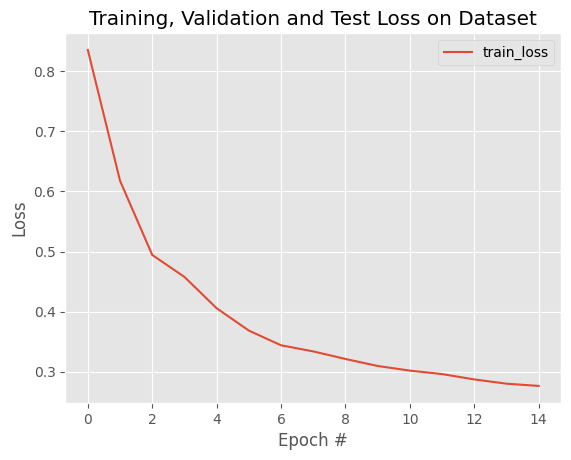

accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▅▄▃▃▂▂▂▂▁▁▁▁▁▁
precision,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▅▄▃▃▂▂▂▂▁▁▁▁▁▁
val_loss,█▅▄▃▂▂▂▁▁▁▁▁▁▁▁
accuracy,0.57143
epoch,14
loss,0.27646
precision,0.57143
train_loss,0.27646


[INFO] Training the network for 20 epochs...


  5%|▌         | 1/20 [00:14<04:44, 14.97s/it]

[INFO] EPOCH: 1/20
Train loss: 0.269734


 10%|█         | 2/20 [00:29<04:29, 14.97s/it]

[INFO] EPOCH: 2/20
Train loss: 0.263988


 10%|█         | 2/20 [00:42<06:24, 21.36s/it]


KeyboardInterrupt: 

In [12]:
# https://github.com/qubvel/segmentation_models.pytorch

wandb.login()


# Initialize the U-Net model

#### Resnet backbone ####
# unet = smp.Unet(
#                 encoder_name = "resnet101",
#                 encoder_weights = "imagenet",
#                 in_channels = 3,  # Assuming 3 channels for both original and altered images
#                 classes = 1  # Output classes (1 for mask)
#                ).to(device)

#### Vision Transformer backbone ####
unet = smp.Unet(
                encoder_name = "mit_b3",
                encoder_weights = "imagenet",
                in_channels = 3,  # Assuming 3 channels for both original and altered images
                classes = 1  # Output classes (1 for mask)
               ).to(device)

# Define hyperparameters
INIT_LR = 0.0001
BATCH_SIZE = 8
NUM_EPOCHS = [15, 20, 50, 100, 150]
TEST_SPLIT = [0.2] # 0.3
VALID_SPLIT = 0.2 # 0.1

# Initialize loss function and optimizer
lossFunc = nn.BCEWithLogitsLoss()
opt = torch.optim.Adam(unet.parameters(), lr=INIT_LR)


# Create DataLoader for the dataset
trainLoader = DataLoader(dataset, shuffle = True, batch_size = BATCH_SIZE)
print("Dataset length:", len(trainLoader.dataset))

# Calculate steps per epoch for training set
trainSteps = len(trainLoader)

for tts in TEST_SPLIT:
    print("[INFO] TEST_SPLIT = {} ...".format(tts))

    print("Splits, Datasets, and Dataloaders")
    startTime = time.time()

    train_orig_images, test_orig_images, train_altered_images, test_altered_images, train_masks, test_masks = train_test_split(original_images, altered_images, masks, test_size = tts, random_state = 42)
    train_orig_images, val_orig_images, train_altered_images, val_altered_images, train_masks, val_masks = train_test_split(train_orig_images, train_altered_images, train_masks, test_size = VALID_SPLIT, random_state = 42)

    # Create datasets and data loaders for training, validation, and testing sets
    train_dataset = crd.SegmentationDataset(train_orig_images, train_altered_images, train_masks, transforms = transforms_train)
    val_dataset   = crd.SegmentationDataset(val_orig_images,   val_altered_images,   val_masks,   transforms = transforms_test)
    test_dataset  = crd.SegmentationDataset(test_orig_images,  test_altered_images,  test_masks,  transforms = transforms_test)

    train_loader = DataLoader(train_dataset, shuffle = True,  batch_size = BATCH_SIZE)
    val_loader   = DataLoader(val_dataset,   shuffle = False, batch_size = BATCH_SIZE)
    test_loader  = DataLoader(test_dataset,  shuffle = False, batch_size = BATCH_SIZE)


    endTime = time.time()
    print("[INFO] Total time taken to create the dataset and dataloader: {:.2f}s".format(endTime - startTime))

    print(f"[INFO] found {len(dataset)} examples in the training set...")

    # calculate steps per epoch for training set
    trainSteps = len(train_dataset) // BATCH_SIZE
    testSteps  = len(test_dataset) // BATCH_SIZE
    valSteps   = len(val_dataset) // BATCH_SIZE

    print(f"trainSteps = {trainSteps}, testSteps = {testSteps}, valSteps = {valSteps}")

    for epoch in NUM_EPOCHS:

        run = wandb.init(
                          # Set the project where this run will be logged
                          project = "my-project",
                          # Track hyperparameters and run metadata
                          config={
                              "learning_rate": INIT_LR,
                              "epochs": epoch,
                              "batch": BATCH_SIZE
                                 },
                        )

        # Initialize dictionary to store training history
        H = {"train_loss": [], "val_loss": [], "test_loss": []}
        Perf_Metrics = {"accuracy": [], "precision": [], "recall": [], "f1_score": []}
        Dice_IOU = {"dice": [], "iou": []}

        print("[INFO] Training the network for {} epochs...".format(epoch))

        startTime = time.time()

        for e in tqdm(range(epoch)):

            # initialize variables for output
            totalTrainLoss, totalTestLoss, totalValLoss = 0, 0, 0
            accuracy_scores, precision_score, recall_scores, f1_scores = 0, 0, 0, 0
            dice_scores, iou_scores = 0, 0



            #### TRINING LOOP ####
            unet.train() # unet.train.train()
            for orig_images, altered_images, masks in train_loader:
                images, altered_images, masks = orig_images.to(device), altered_images.to(device), masks.to(device)

                opt.zero_grad()
                pred_masks = unet(images) # they are not binary => the binary masks are displayed using the vizualize function with a threshold
                # pred_masks = torch.sigmoid(pred_masks)

                loss = lossFunc(pred_masks, masks)
                loss.backward()
                opt.step()

                pred_masks = (pred_masks > 0.5).float()

                totalTrainLoss += loss.item()

            avg_train_loss = totalTrainLoss / len(train_loader)




            #### VALIDATION LOOP ####
            unet.eval()
            with torch.no_grad():
                total_val_loss = 0
                for orig_images, altered_images, masks in val_loader:
                    orig_images, altered_images, masks = orig_images.to(device), altered_images.to(device), masks.to(device)
                    pred_masks = unet(orig_images)
                    val_loss = lossFunc(pred_masks, masks)

                    totalValLoss += val_loss.item()

            avg_val_loss = totalValLoss / len(val_loader)

            # Log the losses to WandB
            wandb.log({"train_loss": avg_train_loss, "val_loss": avg_val_loss, "epoch": e})



            #### TESTING LOOP ####
            unet.eval()
            with torch.no_grad():
                for orig_images, altered_images, masks in test_loader:
                    orig_images, altered_images, masks = orig_images.to(device), altered_images.to(device), masks.to(device)
                    pred_masks = unet(orig_images)


                    # calculate Dice coefficient and IoU score
                    metrics = cm.calculate_metrics(masks.cpu().numpy(), pred_masks.cpu().numpy())
                    accuracy, precision, recall, f1_score = metrics

                    dice_coefficient = cm.calculate_dice_coefficient(masks.cpu().numpy(), pred_masks.cpu().numpy())
                    iou = cm.calculate_iou(masks.cpu().numpy(), pred_masks.cpu().numpy())

                    # avg metrics
                    accuracy_scores += accuracy
                    precision_score += precision
                    recall_scores += recall
                    f1_scores += f1_score

                    dice_scores += dice_coefficient
                    iou_scores += iou


                # visualize_images(images.cpu(), altered_images.cpu(), masks.cpu(), pred_masks.cpu()) #, threshold = tenth_highest_value)


            # Averaging performance metrics and updating training history
            avgTrainLoss = totalTrainLoss / trainSteps
            avgValLoss = totalValLoss / valSteps
            avgTestLoss = totalTestLoss / testSteps

            accuracy_scores = accuracy_scores / testSteps #testSteps
            precision_score = precision_score / testSteps
            recall_scores = recall_scores / testSteps
            f1_scores = f1_scores / testSteps

            dice_scores = dice_scores / testSteps
            iou_scores = iou_scores / testSteps

            # update our training history
            H["train_loss"].append(avgTrainLoss)
            H["val_loss"].append(avgValLoss)
            H["test_loss"].append(avgTestLoss)

            # update our performance metrics history
            Perf_Metrics["accuracy"].append(accuracy_scores)
            Perf_Metrics["precision"].append(precision_score)
            Perf_Metrics["recall"].append(recall_scores)
            Perf_Metrics["f1_score"].append(f1_scores)


            # update our dice and IOU score history
            Dice_IOU["dice"].append(dice_scores)
            Dice_IOU["iou"].append(iou_scores)

            # Print training loss
            print("[INFO] EPOCH: {}/{}".format(e + 1, epoch))
            print("Train loss: {:.6f}".format(avgTrainLoss))

            wandb.log({"accuracy": accuracy_scores, "precision": precision_score, "loss": avgTrainLoss})

        # Display total time taken to perform the training
        endTime = time.time()
        print("[INFO] Total time taken to train the model: {:.2f}s".format(endTime - startTime))


        # Display performance metrics
        print('\n')
        dm.display_metrics(Perf_Metrics, Dice_IOU)


        # Plot results - images
        print('\n')
        lent = orig_images.cpu().numpy().shape[0]
        pr.plot_results(lent, orig_images, altered_images, masks, pred_masks)


        # plot the training loss
        plt.style.use("ggplot")
        plt.figure()
        plt.plot(H["train_loss"], label = "train_loss")
        # plt.plot(H["val_loss"], label="val_loss")
        # plt.plot(H["test_loss"], label="test_loss")
        plt.title("Training, Validation and Test Loss on Dataset")
        plt.xlabel("Epoch #")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()


        print('\n')


TypeError: plot_results() takes 1 positional argument but 5 were given